In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.2)
import pandas as pd
import warnings
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
DataDetailsFolder = '/home/sheffieldlab/Desktop/NoReward/Scripts/AnimalDetails/'
sys.path.append(DataDetailsFolder)
import DataDetails
from RewardCell_Analysis import Combinedpfs as cp

In [3]:
SaveFiguresFolder ='/home/sheffieldlab/Desktop/NoReward/PaperFigures/Figure3/'

## Look at combined COM scatter to check if there are any reward cells

In [4]:
ParentDataFolder = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/'
CombinedFolder = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/PlaceCellResults_All/'
donotuse = []
task_dict = {'Task1':'1 Fam Rew', 'Task2':'2 No Rew', 'Task3':'3 Fam Rew', 'Task4':'4 Nov Rew'}

In [5]:
x = cp(CombinedFolder, ParentDataFolder, task_dict, norewardtask=['Task2'], donotuseanimal=[], tasklen=2)

NR34_rewardcellparams_df.csv
NR21_rewardcellparams_df.csv
NR23_rewardcellparams_df.csv
CFC19_rewardcellparams_df.csv
NR32_rewardcellparams_df.csv
NR6_rewardcellparams_df.csv
CFC16_rewardcellparams_df.csv
NR14_rewardcellparams_df.csv
NR24_rewardcellparams_df.csv
CFC4_rewardcellparams_df.csv
CFC17_rewardcellparams_df.csv
NR15_rewardcellparams_df.csv
NR32_placecellparams_df.csv
NR6_placecellparams_df.csv
NR21_placecellparams_df.csv
NR14_placecellparams_df.csv
CFC19_placecellparams_df.csv
CFC17_placecellparams_df.csv
NR15_placecellparams_df.csv
CFC4_placecellparams_df.csv
NR34_placecellparams_df.csv
NR24_placecellparams_df.csv
NR23_placecellparams_df.csv
CFC16_placecellparams_df.csv


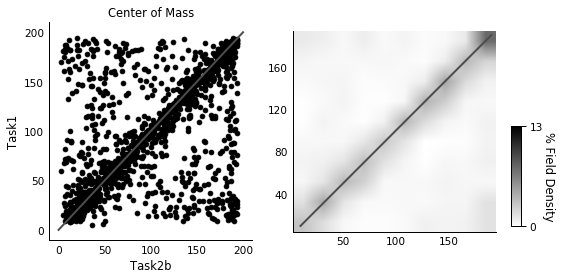

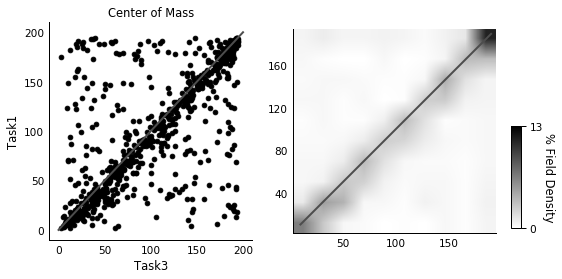

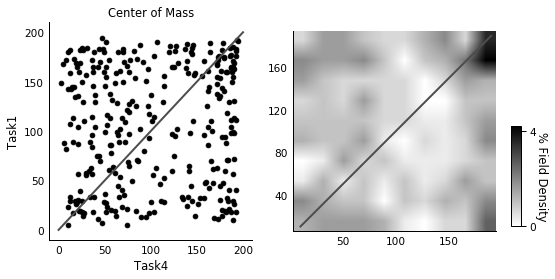

In [6]:
x.get_com_allanimal(taskA='Task1', taskB='Task2b', vmax=13)
x.get_com_allanimal(taskA='Task1', taskB='Task3', vmax=13)
x.get_com_allanimal(taskA='Task1', taskB='Task4')

## Overrepresentation of reward?

### Plot histogram of COM

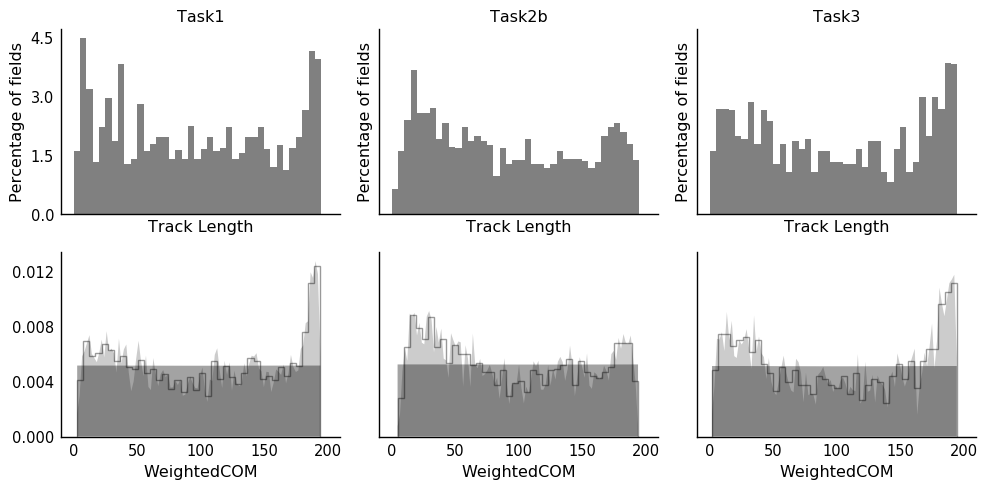

In [7]:
h, c = x.plot_histogram_of_com(x.pfparam_combined, 
                         tasks_to_plot=['Task1', 'Task2b', 'Task3'], 
                               bins=5, figsize=(10, 5))

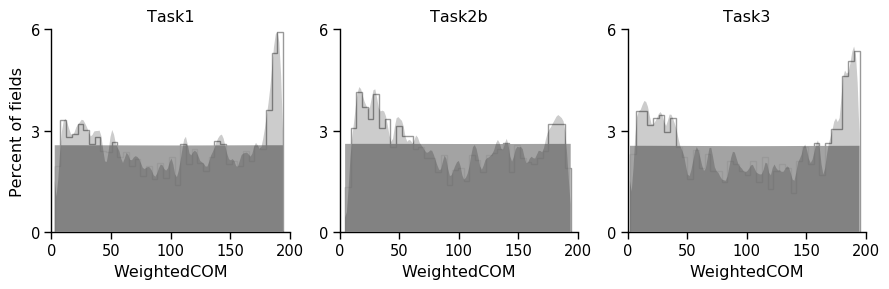

In [8]:
fs, ax = plt.subplots(1, 3, dpi=100, sharex='all')
h = x.plot_com_hist(ax, x.pfparam_combined, 
                         tasks_to_plot=['Task1', 'Task2b', 'Task3'], 
                               bins=5)
fs.set_size_inches((9, 3))
fs.tight_layout()
fs.savefig(os.path.join(SaveFiguresFolder, 'Rewardoverrepresentation_Exp.pdf'),  bbox_inches='tight', transparent=True)

## Histogram of COM - Control Animals

In [9]:
CombinedFolder = '/home/sheffieldlab/Desktop/NoReward/ControlData/Dataused/PlaceCellResults_All/'
ParentDataFolder = '/home/sheffieldlab/Desktop/NoReward/ControlData/Dataused/'
donotuse = []
task_dict = {'Task1a':'1 Fam Rew', 'Task1b':'2 Fam Rew'}

In [10]:
y = cp(CombinedFolder, ParentDataFolder, task_dict, norewardtask=['Task2'], donotuseanimal=[], controlflag=1, tasklen=2)

CFC19_placecellparams_df.csv
CFC17_placecellparams_df.csv
CFC4_placecellparams_df.csv
NR31_placecellparams_df.csv
NR34_placecellparams_df.csv
CFC3_placecellparams_df.csv


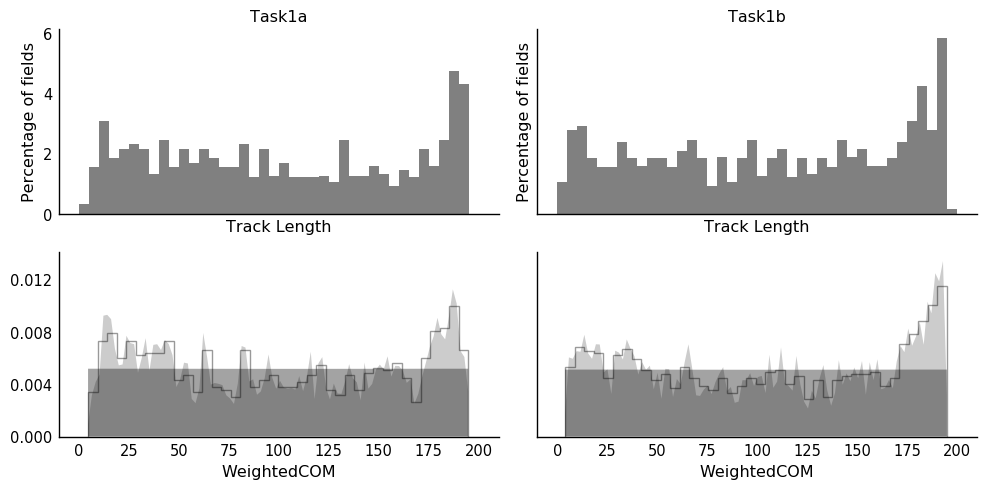

In [11]:
h, c = y.plot_histogram_of_com(y.pfparam_combined, 
                         tasks_to_plot=['Task1a', 'Task1b'], 
                               bins=5, figsize=(10, 5))

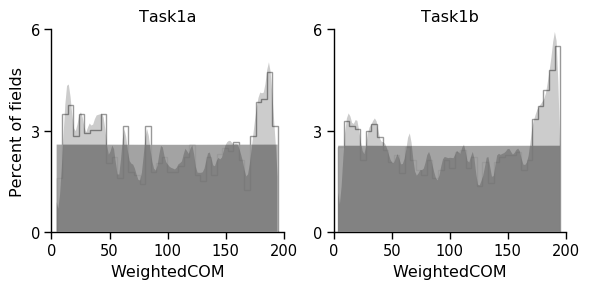

In [12]:
fs, ax = plt.subplots(1, 2, dpi=100, sharex='all')
h = y.plot_com_hist(ax, y.pfparam_combined, 
                         tasks_to_plot=['Task1a', 'Task1b'], 
                               bins=5)
fs.set_size_inches((6, 3))
fs.tight_layout()
fs.savefig(os.path.join(SaveFiguresFolder, 'Rewardoverrepresentation_Control.pdf'),  bbox_inches='tight', transparent=True)

## Reward track changes

Track Beg : Between Task1 and Task2b: 0.209, significant False
Track Beg : Between Task1 and Task3: 0.337, significant False
Track Beg : Between Task2b and Task3: 0.187, significant False
Track Beg : Between Task3 and Task2b: 0.187, significant False
Track Mid : Between Task1 and Task2b: 0.253, significant False
Track Mid : Between Task1 and Task3: 0.500, significant False
Track Mid : Between Task2b and Task3: 0.407, significant False
Track Mid : Between Task3 and Task2b: 0.407, significant False
Track End : Between Task1 and Task2b: 0.008, significant True
Track End : Between Task1 and Task3: 0.303, significant False
Track End : Between Task2b and Task3: 0.042, significant True
Track End : Between Task3 and Task2b: 0.042, significant True
Track Beg : Between Task1a and Task1b: 0.288, significant False
Track Mid : Between Task1a and Task1b: 0.288, significant False
Track End : Between Task1a and Task1b: 0.189, significant False


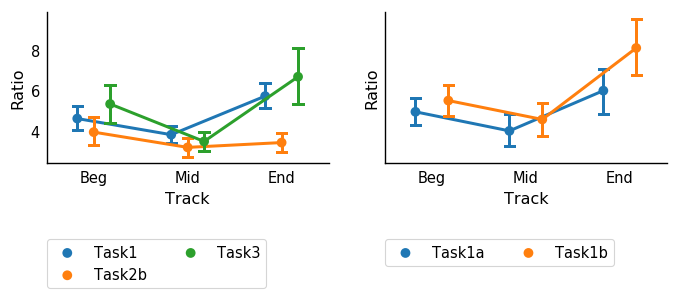

In [13]:
fs, ax = plt.subplots(1, 2, dpi=100, sharex='all', sharey='all')
d, d1, c = x.calculate_ratiofiring_atrewzone(ax[0], x.pfparam_combined,
                                      tasks_to_compare=['Task1', 'Task2b', 'Task3'],
                                      ranges=np.arange(0, 225, 25))
d, d1, c = y.calculate_ratiofiring_atrewzone(ax[1], y.pfparam_combined,
                                      tasks_to_compare=['Task1a', 'Task1b'],
                                      ranges=np.arange(0, 225, 25))
fs.set_size_inches((8, 2))
fs.savefig(os.path.join(SaveFiguresFolder, 'Rewardoverrepresentation_Bargraph.pdf'),  bbox_inches='tight', transparent=True)

## Find Reward Cells

In [ ]:
CombinedFolder = '/home/sheffieldlab/Desktop/NoReward/PlaceFieldCodeTest/ExpAnimals/PlaceCellResults_All/'
ParentDataFolder = '/home/sheffieldlab/Desktop/NoReward/PlaceFieldCodeTest/ExpAnimals/'
donotuse = []
task_dict = {'Task1':'1 Fam Rew', 'Task2':'2 No Rew', 'Task3':'3 Fam Rew', 'Task4':'4 Nov Rew'}

In [ ]:
from RewardCell_Analysis import FindRewardCells as frc
f = frc(CombinedFolder, ParentDataFolder, task_dict, norewardtask=['Task2'], donotuseanimal=[])

In [ ]:
reward_df = f.find_plot_common_end_ofzone_cells(taskA='Task1', taskB='Task4', difference=5) #5 = 25cm
f.plot_binmean_of_rewardcells(reward_data=reward_df)
c1 = f.get_data_for_correlation(reward_df)
m1 = f.get_mean_correlation_withtaskA(reward_df)

In [ ]:
reward_df_endzone = f.find_rewardcells_atrewardzone(taskA='Task1', taskB='Task4', difference=15)
f.plot_binmean_of_rewardcells(reward_data=reward_df_endzone, endzoneflag=1)
c2 = f.get_data_for_correlation(reward_data=reward_df_endzone, endzoneflag=1)
m2 = f.get_mean_correlation_withtaskA(reward_data=reward_df_endzone, endzoneflag=1)

In [ ]:
f.plot_mean_correlation_with_taskA(m1, m2)

In [ ]:
d = f.plot_stability_precision_of_reward_cells(pd.concat((reward_df, reward_df_endzone), ignore_index=True))